In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from const import METHODS


In [2]:
base_path = "./parsed/"

In [39]:
def combine_data():
    data = pd.DataFrame()
    for method in METHODS:
        if METHODS[method]["path"]:
            df = pd.read_csv(base_path + method + ".csv")
            data = pd.concat([data, df])
    return data

In [40]:
combined_data = combine_data()

In [17]:
def plot_captcha_distribution_line(filepath: str):
    filepath = base_path + filepath
    df = pd.read_csv(filepath)
    df = df.sort_values("id")
    df["captcha"] = df["captcha"].astype(int)

    plt.figure(figsize=(10, 5))
    plt.plot(df["id"], df["captcha"], marker="o", linestyle="-", color="b", label="True/False")
    plt.xlabel("Subsequent runs")
    plt.ylabel("Presence of a captcha mechanism (1 - True, 0 - False)")
    plt.title("True/False Time Series")
    plt.yticks([0, 1], ["False", "True"])
    plt.grid(True)
    plt.legend()
    plt.show()

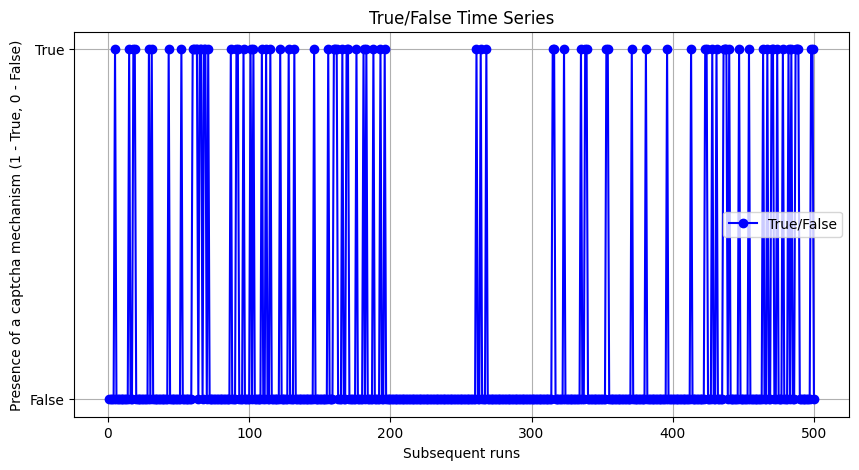

In [18]:
plot_captcha_distribution_line("SELENIUM_CAPTCHA.csv")

In [15]:
def plot_captcha_distribution_heatmap(filepath: str):
    filepath = base_path + filepath
    df = pd.read_csv(filepath)

    heatmap_data = df["captcha"].values.reshape(-1, 10)

    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, cmap="coolwarm", cbar=False, linewidths=0.5, linecolor='gray')
    plt.title("Captcha (True/False) Heatmap")
    plt.xlabel("Record Number (Grouped)")
    plt.ylabel("Groups")
    plt.show()

In [63]:
def plot_captcha_distribution_event(filepath: str):
    filepath = base_path + filepath
    df = pd.read_csv(filepath)

    true_events = df[df["captcha"] == 1]

    plt.figure(figsize=(12, 3))
    plt.scatter(true_events["id"], [1]*len(true_events), color="green", label="True", alpha=0.6)
    plt.xlabel("Subsequent runs")
    plt.title("CAPTCHA Event Distribution for Selenium (AC + UA)")
    plt.yticks([])
    plt.legend()
    plt.grid(axis='x')
    plt.show()

In [20]:
def plot_captcha_distribution_rolling(filepath: str):
    filepath = base_path + filepath
    df = pd.read_csv(filepath)
    df["captcha"] = df["captcha"].astype(int)

    df["rolling_mean"] = df["captcha"].rolling(window=10).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df["id"], df["rolling_mean"], color="orange", label="Rolling Mean (10 Records)")
    plt.xlabel("Record Number (ID)")
    plt.ylabel("Proportion of Captcha (True)")
    plt.title("Captcha (True) Value Trend (Rolling Average)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:
def plot_captcha_distribution_bar(filepath: str):
    filepath = base_path + filepath
    df = pd.read_csv(filepath)
    df["captcha"] = df["captcha"].astype(int)

    df["chunk"] = (df.index // 10) 
    grouped = df.groupby("chunk")["captcha"].value_counts().unstack(fill_value=0)

    grouped.plot(kind="bar", stacked=True, figsize=(12, 6), color=["red", "green"], alpha=0.7)
    plt.xlabel("Group Number")
    plt.ylabel("Count")
    plt.title("Captcha (True/False) Distribution Over Time")
    plt.legend(["False", "True"])
    plt.show()


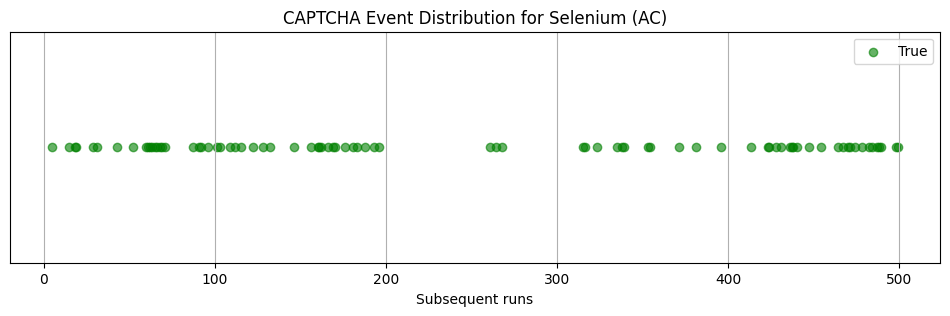

In [62]:
plot_captcha_distribution_event("SELENIUM_CAPTCHA.csv")

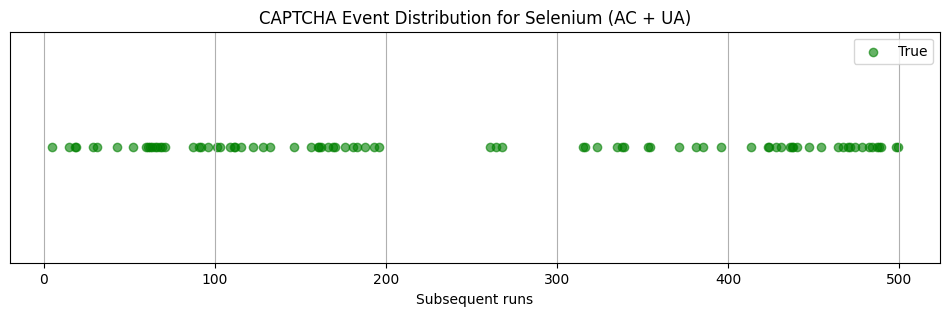

In [64]:
plot_captcha_distribution_event("SELENIUM_CAPTCHA_ROTATE_USER_AGENT.csv")


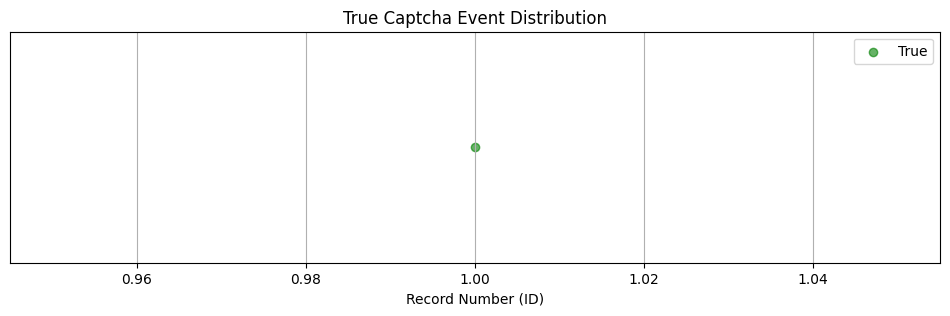

In [25]:
plot_captcha_distribution_event("SELENIUM_CAPTCHA_ROTATE_USER_AGENT_PROXY.csv")


['Static HTML', 'Static HTML (UA)', 'Static HTML (UA + R)']


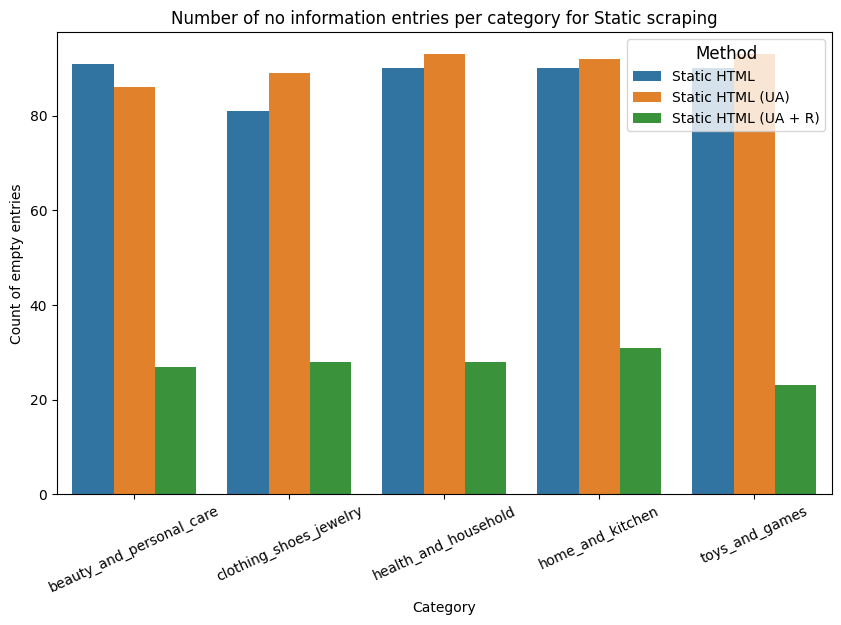

In [57]:

df = combined_data
categories_to_keep = ["STATIC_BARE", "STATIC_ROTATE_USER_AGENT_RETRIES", "STATIC_ROTATE_USER_AGENT"]

df = df[df["method"].isin(categories_to_keep)]
result = df[df['is_empty']].groupby(['method', 'category']).size().unstack(fill_value=0)
result = result.reset_index().melt(id_vars="method", var_name="category", value_name="count")
method_to_tick = {method: data["tick"] for method, data in METHODS.items()}

plt.figure(figsize=(10, 6))
sns.barplot(data=result, x="category", y="count", hue="method")
plt.title("Number of no information entries per category for Static scraping")
plt.ylabel("Count of empty entries")
plt.xlabel("Category")
plt.xticks(range(len(result["category"].unique())), result["category"].unique(), rotation=25)
handles, labels = plt.gca().get_legend_handles_labels()

new_labels = [method_to_tick[label] for label in labels]
print(new_labels)
plt.legend(handles=handles, labels=new_labels, title="Method", fontsize=10, title_fontsize=12)

plt.show()

In [ ]:

df = combined_data
categories_to_keep = ["STATIC_BARE", "STATIC_ROTATE_USER_AGENT_RETRIES", "STATIC_ROTATE_USER_AGENT"]

df = df[df["method"].isin(categories_to_keep)]
result = df[df['is_empty']].groupby(['method', 'category']).size().unstack(fill_value=0)
result = result.reset_index().melt(id_vars="method", var_name="category", value_name="count")
method_to_tick = {method: data["tick"] for method, data in METHODS.items()}

plt.figure(figsize=(10, 6))
sns.barplot(data=result, x="category", y="count", hue="method")
plt.title("Number of no information entries per category for Static scraping")
plt.ylabel("Count of empty entries")
plt.xlabel("Category")
plt.xticks(range(len(result["category"].unique())), result["category"].unique(), rotation=25)
handles, labels = plt.gca().get_legend_handles_labels()

new_labels = [method_to_tick[label] for label in labels]
print(new_labels)
plt.legend(handles=handles, labels=new_labels, title="Method", fontsize=10, title_fontsize=12)

plt.show()

/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_60344/205607817.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


['Rainforest API', 'Selenium', 'Selenium (AC)', 'Selenium (AC + UA)', 'Selenium (AC + UA + P)', 'SP API', 'Static HTML', 'Static HTML (UA)', 'Static HTML (UA + R)']


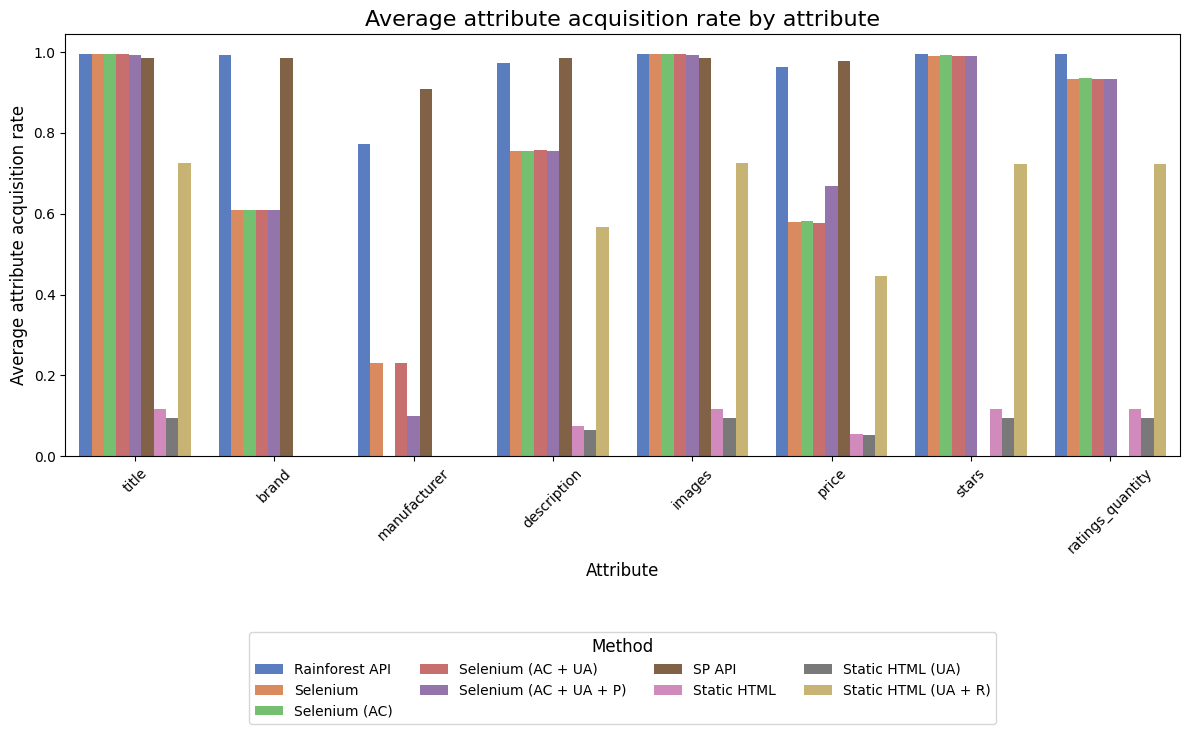

In [51]:
columns_to_analyze = ['title', 'brand', 'manufacturer', 'description', 'images', 'price', 'stars', 'ratings_quantity']

df = combined_data
average_values = df.groupby('method')[columns_to_analyze].mean()

average_values = average_values.reset_index().melt(id_vars="method", var_name="attribute", value_name="average_True")
method_to_tick = {method: data["tick"] for method, data in METHODS.items()}

plt.figure(figsize=(12, 6))
palette = sns.color_palette("muted", n_colors=average_values["method"].nunique())

sns.barplot(
    data=average_values, 
    x="attribute", 
    y="average_True", 
    hue="method", 
    palette=palette,
    ci=None
)

plt.title("Average attribute acquisition rate by attribute", fontsize=16)
plt.ylabel("Average attribute acquisition rate", fontsize=12)
plt.xlabel("Attribute", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = [method_to_tick[label] for label in labels]
print(new_labels)
plt.legend(handles=handles, labels=new_labels, title="Method", fontsize=10, title_fontsize=12, loc="upper center", bbox_to_anchor=(0.5, -0.4), ncol=4)

plt.show()

/var/folders/r4/jx9mrl69663d5mws4ghflznm0000gn/T/ipykernel_60344/3952960767.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['obtained_attributes'] = df[attribute_columns].sum(axis=1)


['Selenium', 'Selenium (AC)', 'Selenium (AC + UA)', 'Selenium (AC + UA + P)']


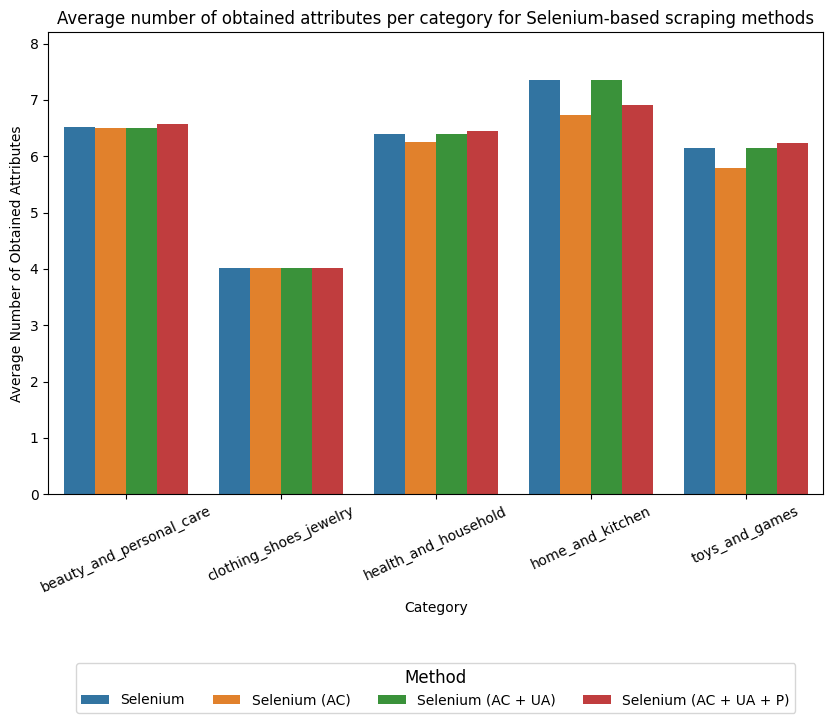

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categories_to_keep = ["SELENIUM_BARE", "SELENIUM_CAPTCHA", "SELENIUM_CAPTCHA_ROTATE_USER_AGENT", "SELENIUM_CAPTCHA_ROTATE_USER_AGENT_PROXY"]
df = combined_data[combined_data["method"].isin(categories_to_keep)]
attribute_columns = ['title', 'brand', 'manufacturer', 'description', 'images', 'price', 'stars', 'ratings_quantity']
df['obtained_attributes'] = df[attribute_columns].sum(axis=1)

average_attributes = df.groupby(['method', 'category'])['obtained_attributes'].mean().unstack(fill_value=0)
result = average_attributes.reset_index().melt(id_vars="method", var_name="category", value_name="average_obtained_attributes")
method_to_tick = {method: data["tick"] for method, data in METHODS.items()}
plt.figure(figsize=(10, 6))
sns.barplot(data=result, x="category", y="average_obtained_attributes", hue="method")
plt.title("Average number of obtained attributes per category for Selenium-based scraping methods")
plt.ylabel("Average Number of Obtained Attributes")
plt.ylim(0, 8.2)
plt.xlabel("Category")
plt.xticks(range(len(result["category"].unique())), result["category"].unique(), rotation=25)

handles, labels = plt.gca().get_legend_handles_labels()

new_labels = [method_to_tick[label] for label in labels]
print(new_labels)
plt.legend(handles=handles, labels=new_labels, title="Method", fontsize=10, title_fontsize=12, loc="upper center", bbox_to_anchor=(0.5, -0.35), ncol=4)

plt.show()